**LIKELIHOOD FUNCTION**

*So we want to find p(2, 3, 4, 5, 7, 8, 9, 10; μ, σ). The probability these samples come from a normal distribution with μ and σ. But we don’t know μ and σ, so we need to estimate them.

*Our θ is a parameter which estimates x = [2, 3, 4, 5, 7, 8, 9, 10] which we are assuming comes from a normal distribution PDF shown below.

*Our goal will be the find the values of μ and σ, that maximize our likelihood function

*Reference - https://daijiang.name/en/2014/10/08/mle-normal-distribution/

The max LL for sd 0.50 is -167.88
The max LL for sd 1.00 is -54.04
The max LL for sd 1.50 is -36.84
The max LL for sd 2.50 is -32.28
The max LL for sd 3.00 is -32.82
The max LL for sd 3.50 is -33.77


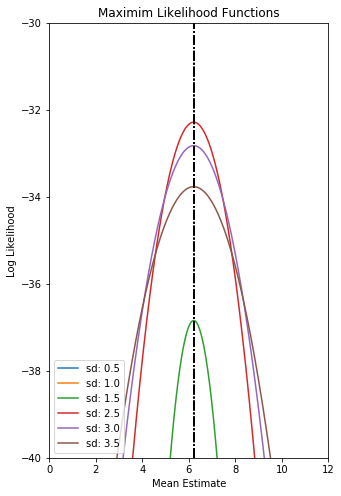

In [15]:
# Plot the Maximum Likelihood Functions for different values of mu and sigma

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    plt.ylim(-40, -30)
    plt.xlim(0, 12)
    mu_set = np.linspace(0, 16, 1000)
    sd_set = [.5, 1, 1.5, 2.5, 3, 3.5]
    max_val = max_val_location = None

    for i in sd_set:
        ll_array = []
    
        for j in mu_set:
            temp_mm = 0
            
            for k in x:
                temp_mm += np.log(norm.pdf(k, j, i)) # The LL function
            ll_array.append(temp_mm)
        
            if (max_val is None):
                max_val = max(ll_array)
            elif max(ll_array) > max_val:
                max_val = max(ll_array)
                max_val_location = j
        
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %.1f" %i)
        
        print ("The max LL for sd %.2f is %.2f" %(i, max(ll_array))) 
        plt.axvline(x=max_val_location, color='black', ls='-.')
        plt.legend(loc='lower left')

plot_ll(x);

**Comparing this with first order method of moments**

*θ_mu = Σ(x) / n = (2 + 3 + 4 + 5 + 7 + 8 + 9 + 10) / 8 = 6.214 

*θ_sigma = Σ(x - θ_mu)^2 / n = Σ(x - 6.214)^2 / 8 = 2.425

In [17]:
print(np.mean(x))
print(np.std(x))

6.214285714285714
2.425418120907092
